11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


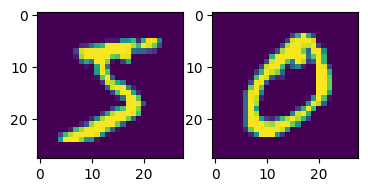

In [2]:
from keras.datasets import mnist
from matplotlib import pyplot

(x_train, y_train), (x_test, y_test) = mnist.load_data()

pyplot.subplot(231)
pyplot.imshow(x_train[0])
pyplot.subplot(232)
pyplot.imshow(x_train[1])
pyplot.show()

In [3]:
import keras
from keras import layers, optimizers

def build_robust_cnn(input_shape=(28, 28, 1), num_classes=10) -> keras.Sequential:
    model = keras.Sequential(name="CNN_MNIST_Robust_v1")
    model.add(layers.Input(shape=input_shape))

    # Block 1
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization()) # Added for stability
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25)) # Added for regularization

    # Block 2
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Flatten and Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

model: keras.Sequential = build_robust_cnn()
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

I0000 00:00:1748381388.154891   14319 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "CNN_MNIST_Robust_v1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,098 (1.79 MB)

 Trainable params: 468,458 (1.79 MB)

 Non-trainable params: 640 (2.50 KB)

In [4]:
# history = model.fit(x_train_processed, y_train, batch_size=128, epochs=10, validation_split=0.1)
history = model.fit(x=x_train, y=y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5


I0000 00:00:1748381400.919060   22615 service.cc:152] XLA service 0x7984f402a2b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748381400.919454   22615 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-05-28 04:30:01.131720: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748381401.929978   22615 cuda_dnn.cc:529] Loaded cuDNN version 90300


  11/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.2198 - loss: 3.0310 

I0000 00:00:1748381408.641974   22615 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - accuracy: 0.8814 - loss: 0.4008 - val_accuracy: 0.9865 - val_loss: 0.0457
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9777 - loss: 0.0755 - val_accuracy: 0.9902 - val_loss: 0.0352
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9836 - loss: 0.0547 - val_accuracy: 0.9903 - val_loss: 0.0330
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9844 - loss: 0.0509 - val_accuracy: 0.9920 - val_loss: 0.0270
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9873 - loss: 0.0400 - val_accuracy: 0.9912 - val_loss: 0.0323


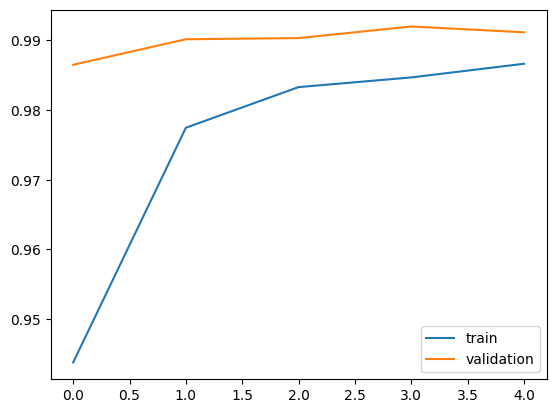

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9896 - loss: 0.0352


[0.02611364983022213, 0.9921000003814697]

In [5]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

model.evaluate(x=x_test, y=y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


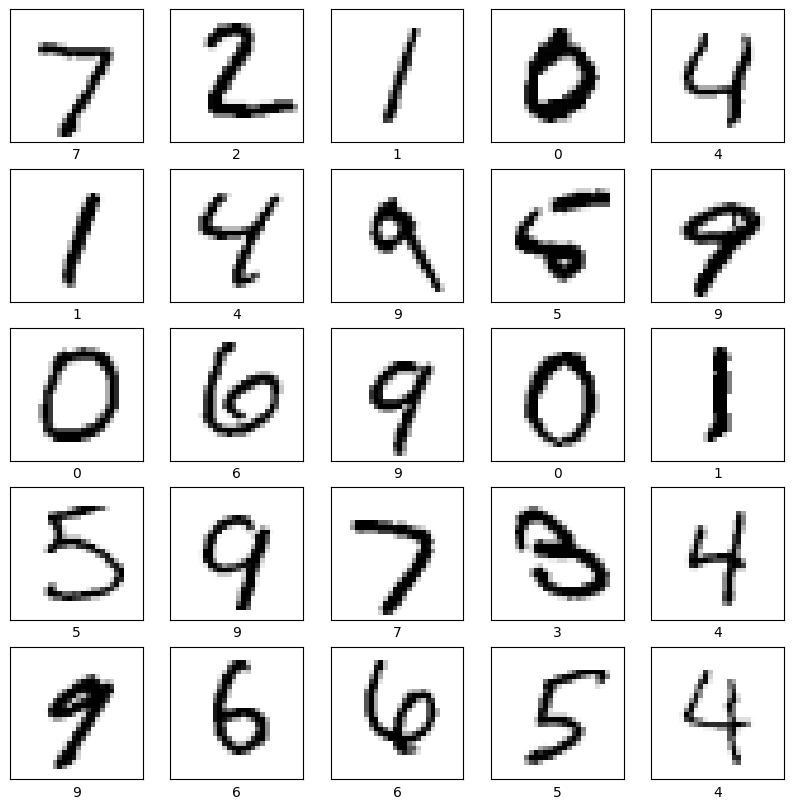

In [8]:
import numpy as np
y_pred = model.predict(x=x_test)
y_pred = np.argmax(y_pred, axis=1)

pyplot.figure(figsize=(10, 10))
for i in range(25):
    pyplot.subplot(5, 5, i + 1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(x_test[i], cmap=pyplot.cm.binary)
    pyplot.xlabel(str(y_pred[i]))
pyplot.show()

# model.save("mnist_cnn_v1.keras")

